# Machine Learning With Spark ML
In this lab assignment, you will complete a project by going through the following steps:
1. Get the data.
2. Discover the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.
5. Fine-tune your model.
6. Present your solution.

As a dataset, we use the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. The dataset has the following columns
1. `longitude`: a measure of how far west a house is (a higher value is farther west)
2. `latitude`: a measure of how far north a house is (a higher value is farther north)
3. `housing_,median_age`: median age of a house within a block (a lower number is a newer building)
4. `total_rooms`: total number of rooms within a block
5. `total_bedrooms`: total number of bedrooms within a block
6. `population`: total number of people residing within a block
7. `households`: total number of households, a group of people residing within a home unit, for a block
8. `median_income`: median income for households within a block of houses
9. `median_house_value`: median house value for households within a block
10. `ocean_proximity`: location of the house w.r.t ocean/sea

---
# 1. Get the data
Let's start the lab by loading the dataset. The can find the dataset at `data/housing.csv`. To infer column types automatically, when you are reading the file, you need to set `inferSchema` to true. Moreover enable the `header` option to read the columns' name from the file.

In [0]:
%python
# TODO: Replace <FILL IN> with appropriate code

housing = spark.read.csv("/FileStore/tables/housing-2.csv", header=True, inferSchema= True)

In [0]:
housing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income median_house_value ocean_proximity -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132000.0 NEAR BAY -122.28 37.84 49.0 1916.0 447.0 863.0 378.0 1.9274 122300.0 NEAR BAY -122.28 37.84 52.0 2153.0 481.0 1168.0 441.0 1.9615 115200.0 NEAR BAY -122.27 37.84 48.0 1922.0 409.0 1026.0 335.0 1.7969 110400.0 NEAR BAY -122.27 37.83 49.0 1655.0 366.0 754.0 329.0 1.375 104900.0 NEAR BAY -122.27 37.83 51.0 2665.0 574.0 1258.0 536.0 2.7303 109700.0 NEAR BAY -122.27 37.83 49.0 1215.0 282.0 570.0 264.0 1.4861 97200.0 NEAR BAY -122.27 37.83 48.0 1798.0 432.0 987.0 374.0 1.0972 104500.0 NEAR BAY -122.28 37.83 52.0 1511.0 390.0 901.0 403.0 1.4103 103900.0 NEAR BAY -122.26 37.83 52.0 1470.0 330.0 689.0 309.0 3.48 191400.0 NEAR BAY -122.26 37.83 52.0 2432.0 715.0 1377.0 696.0 2.5898 176000.0 NEAR BAY -122.26 37.83 52.0 1665.0 419.0 946.0 395.0 2.0978 155400.0 NEAR BAY -122.26 37.83 51.0 936.0 311.0 517.0 249.0 1.2852 150000.0 NEAR BAY -122.26 37.84 49.0 713.0 202.0 462.0 189.0 1.025 118800.0 NEAR BAY -122.26 37.84 52.0 950.0 202.0 467.0 198.0 3.9643 188800.0 NEAR BAY -122.26 37.83 52.0 1443.0 311.0 660.0 292.0 3.0125 184400.0 NEAR BAY -122.26 37.83 52.0 1656.0 420.0 718.0 382.0 2.6768 182300.0 NEAR BAY -122.26 37.83 50.0 1125.0 322.0 616.0 304.0 2.026 142500.0 NEAR BAY -122.27 37.82 43.0 1007.0 312.0 558.0 253.0 1.7348 137500.0 NEAR BAY -122.26 37.82 40.0 624.0 195.0 423.0 160.0 0.9506 187500.0 NEAR BAY -122.27 37.82 40.0 946.0 375.0 700.0 352.0 1.775 112500.0 NEAR BAY -122.27 37.82 21.0 896.0 453.0 735.0 438.0 0.9218 171900.0 NEAR BAY -122.27 37.82 43.0 1868.0 456.0 1061.0 407.0 1.5045 93800.0 NEAR BAY -122.27 37.82 41.0 3221.0 853.0 1959.0 720.0 1.1108 97500.0 NEAR BAY -122.27 37.82 52.0 1630.0 456.0 1162.0 400.0 1.2475 104200.0 NEAR BAY -122.28 37.82 52.0 1170.0 235.0 701.0 233.0 1.6098 87500.0 NEAR BAY -122.28 37.82 52.0 945.0 243.0 576.0 220.0 1.4113 83100.0 NEAR BAY -122.28 37.82 5

---
# 2. Discover the data to gain insights
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:
* See the schema and dimension of the dataset
* Look at the data itself
* Statistical summary of the attributes
* Breakdown of the data by the categorical attribute variable
* Find the correlation among different attributes
* Make new attributes by combining existing attributes

## 2.1. Schema and dimension
Print the schema of the dataset

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing.printSchema()

root
-- longitude: double (nullable = true)
-- latitude: double (nullable = true)
-- housing_median_age: double (nullable = true)
-- total_rooms: double (nullable = true)
-- total_bedrooms: double (nullable = true)
-- population: double (nullable = true)
-- households: double (nullable = true)
-- median_income: double (nullable = true)
-- median_house_value: double (nullable = true)
-- ocean_proximity: string (nullable = true)

Print the number of records in the dataset.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing.count()

Out[25]: 20640

## 2.2. Look at the data
Print the first five records of the dataset.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing.show(5)

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income median_house_value ocean_proximity -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132000.0 NEAR BAY -122.28 37.84 49.0 1916.0 447.0 863.0 378.0 1.9274 122300.0 NEAR BAY -122.28 37.84 52.0 2153.0 481.0 1168.0 441.0 1.9615 115200.0 NEAR BAY -122.27 37.84 48.0 1922.0 409.0 1026.0 335.0 1.7969 110400.0 NEAR BAY -122.27 37.83 49.0 1655.0 366.0 754.0 329.0 1.375 104900.0 NEAR BAY -122.27 37.83 51.0 2665.0 574.0 1258.0 536.0 2.7303 109700.0 NEAR BAY -122.27 37.83 49.0 1215.0 282.0 570.0 264.0 1.4861 97200.0 NEAR BAY -122.27 37.83 48.0 1798.0 432.0 987.0 374.0 1.0972 104500.0 NEAR BAY -122.28 37.83 52.0 1511.0 390.0 901.0 403.0 1.4103 103900.0 NEAR BAY -122.26 37.83 52.0 1470.0 330.0 689.0 309.0 3.48 191400.0 NEAR BAY -122.26 37.83 52.0 2432.0 715.0 1377.0 696.0 2.5898 176000.0 NEAR BAY -122.26 37.83 52.0 1665.0 419.0 946.0 395.0 2.0978 155400.0 NEAR BAY -122.26 37.83 51.0 936.0 311.0 517.0 249.0 1.2852 150000.0 NEAR BAY -122.26 37.84 49.0 713.0 202.0 462.0 189.0 1.025 118800.0 NEAR BAY -122.26 37.84 52.0 950.0 202.0 467.0 198.0 3.9643 188800.0 NEAR BAY -122.26 37.83 52.0 1443.0 311.0 660.0 292.0 3.0125 184400.0 NEAR BAY -122.26 37.83 52.0 1656.0 420.0 718.0 382.0 2.6768 182300.0 NEAR BAY -122.26 37.83 50.0 1125.0 322.0 616.0 304.0 2.026 142500.0 NEAR BAY -122.27 37.82 43.0 1007.0 312.0 558.0 253.0 1.7348 137500.0 NEAR BAY -122.26 37.82 40.0 624.0 195.0 423.0 160.0 0.9506 187500.0 NEAR BAY -122.27 37.82 40.0 946.0 375.0 700.0 352.0 1.775 112500.0 NEAR BAY -122.27 37.82 21.0 896.0 453.0 735.0 438.0 0.9218 171900.0 NEAR BAY -122.27 37.82 43.0 1868.0 456.0 1061.0 407.0 1.5045 93800.0 NEAR BAY -122.27 37.82 41.0 3221.0 853.0 1959.0 720.0 1.1108 97500.0 NEAR BAY -122.27 37.82 52.0 1630.0 456.0 1162.0 400.0 1.2475 104200.0 NEAR BAY -122.28 37.82 52.0 1170.0 235.0 701.0 233.0 1.6098 87500.0 NEAR BAY -122.28 37.82 52.0 945.0 243.0 576.0 220.0 1.4113 83100.0 NEAR BAY -122.28 37.82 5

Print the number of records with population more than 10000.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing.where(housing.population > 1000).count()

Out[27]: 12483

## 2.3. Statistical summary
Print a summary of the table statistics for the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. You can use the `describe` command.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing.describe().display()

summary longitude latitude housing_median_age total_rooms total_bedrooms population households median_income median_house_value ocean_proximity count 20640 20640 20640 20640 20433 20640 20640 20640 20640 20640 mean -119.56970445736148 35.6318614341087 28.639486434108527 2635.7630813953488 537.8705525375618 1425.4767441860465 499.5396802325581 3.8706710029070246 206855.81690891474 null stddev 2.003531723502584 2.135952397457101 12.58555761211163 2181.6152515827944 421.38507007403115 1132.46212176534 382.3297528316098 1.899821717945263 115395.61587441359 null min -124.35 32.54 1.0 2.0 1.0 3.0 1.0 0.4999 14999.0 <1H OCEAN max -114.31 41.95 52.0 39320.0 6445.0 35682.0 6082.0 15.0001 500001.0 NEAR OCEAN

Print the maximum age (`housing_median_age`), the minimum number of rooms (`total_rooms`), and the average of house values (`median_house_value`).

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.sql.functions._
from pyspark.sql.functions import max, min, mean

maxage = housing.select(max('housing_median_age'))
minrooms = housing.select(min('total_rooms'))
meanvalue = housing.select(mean('median_house_value'))

print('Maximum age: ' + str(maxage.collect()[0][0]))
print('Minimum rooms: ' + str(minrooms.collect()[0][0]))
print('Average (median) value: ' + str(meanvalue.collect()[0][0]))

Maximum age: 52.0
Minimum rooms: 2.0
Average (median) value: 206855.81690891474

## 2.4. Breakdown the data by categorical data
Print the number of houses in different areas (`ocean_proximity`), and sort them in descending order.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#housing.display()
housing.createOrReplaceTempView('housing_table')
spark.sql('''
select sum(households), ocean_proximity
from housing_table
group by ocean_proximity
''').display()

sum(households) ocean_proximity 1383.0 ISLAND 1332308.0 NEAR OCEAN 1118931.0 NEAR BAY 4730118.0 <1H OCEAN 3127759.0 INLAND

Print the average value of the houses (`median_house_value`) in different areas (`ocean_proximity`), and call the new column `avg_value` when print it.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

housing\
  .groupBy('ocean_proximity')\
  .mean('median_house_value')\
  .withColumnRenamed('avg(median_house_value)', 'avg_value')\
  .display()

ocean_proximity avg_value ISLAND 380440.0 NEAR OCEAN 249433.97742663656 NEAR BAY 259212.31179039303 <1H OCEAN 240084.28546409807 INLAND 124805.39200122119

Rewrite the above question in SQL.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

spark.sql('''
select mean(median_house_value) as avg_value, ocean_proximity
from housing_table
group by ocean_proximity
''').display()

avg_value ocean_proximity 380440.0 ISLAND 249433.97742663656 NEAR OCEAN 259212.31179039303 NEAR BAY 240084.28546409807 <1H OCEAN 124805.39200122119 INLAND

## 2.5. Correlation among attributes
Print the correlation among the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. To do so, first you need to put these attributes into one vector. Then, compute the standard correlation coefficient (Pearson) between every pair of attributes in this new vector. To make a vector of these attributes, you can use the `VectorAssembler` Transformer.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.feature.VectorAssembler
from pyspark.ml.feature import VectorAssembler

#val va = new VectorAssembler().setInputCols(<FILL IN>).setOutputCol(<FILL IN>)
va = VectorAssembler().setInputCols(['housing_median_age', 'total_rooms', 'median_house_value', 'population']).setOutputCol('attributes_for_correlation')

housingAttrs = va.transform(housing)

housingAttrs.display(5)

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income median_house_value ocean_proximity attributes_for_correlation -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY List(1, 4, List(), List(41.0, 880.0, 452600.0, 322.0)) -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY List(1, 4, List(), List(21.0, 7099.0, 358500.0, 2401.0)) -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY List(1, 4, List(), List(52.0, 1467.0, 352100.0, 496.0)) -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY List(1, 4, List(), List(52.0, 1274.0, 341300.0, 558.0)) -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY List(1, 4, List(), List(52.0, 1627.0, 342200.0, 565.0)) -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY List(1, 4, List(), List(52.0, 919.0, 269700.0, 413.0)) -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY List(1, 4, List(), List(52.0, 2535.0, 299200.0, 1094.0)) -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY List(1, 4, List(), List(52.0, 3104.0, 241400.0, 1157.0)) -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY List(1, 4, List(), List(42.0, 2555.0, 226700.0, 1206.0)) -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY List(1, 4, List(), List(52.0, 3549.0, 261100.0, 1551.0)) -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY List(1, 4, List(), List(52.0, 2202.0, 281500.0, 910.0)) -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY List(1, 4, List(), List(52.0, 3503.0, 241800.0, 1504.0)) -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY List(1, 4, List(), List(52.0, 2491.0, 213500.0, 1098.0)) -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY List(1, 4, List(), List(52.0, 696.0, 191300.0, 345.0)) -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY List(1, 4, List(), List(52.0, 2643.0, 159200.0, 1212.0)) -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY List(1, 4, List(), List(50.0, 1120.0, 140000.0, 697.0)) -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY List(1, 4, List(), List(52.0, 1966.0, 152500.0, 793.0)) -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY List(1, 4, List(), List(52.0, 1228.0, 155500.0, 648.0)) -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY List(1, 4, List(), List(50.0, 2239.0, 158700.0, 990.0)) -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY List(1, 4, List(), List(52.0, 1503.0, 162900.0, 690.0)) -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY List(1, 4, List(), List(40.0, 751.0, 147500.0, 409.0)) -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY List(1, 4, List(), List(42.0, 1639.0, 159800.0, 929.0)) -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY List(1, 4, List(), List(52.0, 2436.0, 113900.0, 1015.0)) -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY List(1, 4, List(), List(52.0, 1688.0, 99700.0, 853.0)) -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY List(1, 4, List(), List(52.0, 2224.0, 132600.0, 1006.0)) -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY List(1, 4, List(), List(41.0, 535.0, 107500.0, 317.0)) -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY List(1, 4, List(), List(49.0, 1130.0, 93800.0, 607.0)) -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY List(1, 4, List(), List(52.0, 1898.0, 105500.0, 1102.0)) -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY List(1, 4, List(), List(50.0, 2082.0, 108900.0, 1131.0)) -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132000.0 NEAR BAY List(1, 4, List(), List(52.0, 729.0, 132000.0, 395.0)) -122.28 37.84 49.0 1916.0 447.0 863.0 378.0 1.9274 122300.0 NEAR BAY List(1, 4, List(),

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.linalg.Matrix
#import org.apache.spark.ml.stat.Correlation
#import org.apache.spark.sql.Row

from pyspark.ml.stat import Correlation

#val Row(coeff: Matrix) = Correlation.<FILL IN>

coeff = Correlation.corr(housingAttrs, 'attributes_for_correlation')
print("The standard correlation coefficient:\n" + str(coeff.head()[0]))

The standard correlation coefficient:
DenseMatrix([[ 1. , -0.3612622 , 0.10562341, -0.29624424],
 [-0.3612622 , 1. , 0.13415311, 0.85712597],
 [ 0.10562341, 0.13415311, 1. , -0.02464968],
 [-0.29624424, 0.85712597, -0.02464968, 1. ]])

## 2.6. Combine and make new attributes
Now, let's try out various attribute combinations. In the given dataset, the total number of rooms in a block is not very useful, if we don't know how many households there are. What we really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful, and we want to compare it to the number of rooms. And the population per household seems like also an interesting attribute combination to look at. To do so, add the three new columns to the dataset as below. We will call the new dataset the `housingExtra`.
```
rooms_per_household = total_rooms / households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / households
```

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#val housingCol1 = housing.<FILL IN>
#val housingCol2 = housingCol1.<FILL IN>
#val housingExtra = housingCol2.<FILL IN>

#housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").show(5)

from pyspark.sql.functions import col

housingExtra = housing\
  .withColumn('rooms_per_household', col('total_rooms') / col('households'))\
  .withColumn('bedrooms_per_room', col('total_bedrooms') / col('total_rooms'))\
  .withColumn('population_per_household', col('population') / col('households'))

housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").show(5)




+-------------------+-------------------+------------------------+
rooms_per_household| bedrooms_per_room|population_per_household|
+-------------------+-------------------+------------------------+
 6.984126984126984|0.14659090909090908| 2.5555555555555554|
 6.238137082601054|0.15579659106916466| 2.109841827768014|
 8.288135593220339|0.12951601908657123| 2.8022598870056497|
 5.8173515981735155|0.18445839874411302| 2.547945205479452|
 6.281853281853282| 0.1720958819913952| 2.1814671814671813|
+-------------------+-------------------+------------------------+
only showing top 5 rows

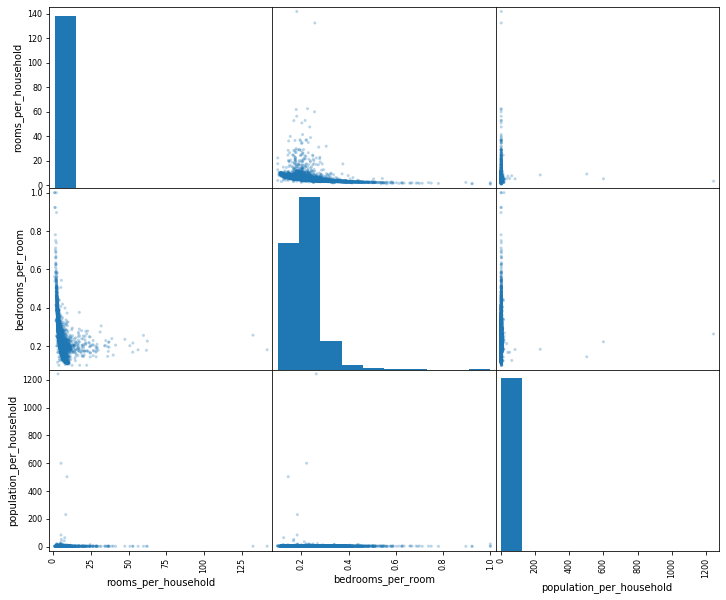

In [0]:
# Extra exploration 

from pandas.plotting import scatter_matrix

scatter_matrix(housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").toPandas(), figsize=(12,10), alpha=0.3)

---
## 3. Prepare the data for Machine Learning algorithms
Before going through the Machine Learning steps, let's first rename the label column from `median_house_value` to `label`.

In [0]:
#// TODO: Replace <FILL IN> with appropriate code

#val renamedHousing = housingExtra.<FILL IN>
renamedHousing = housingExtra.withColumnRenamed('median_house_value', 'label')

Now, we want to separate the numerical attributes from the categorical attribute (`ocean_proximity`) and keep their column names in two different lists. Moreover, sice we don't want to apply the same transformations to the predictors (features) and the label, we should remove the label attribute from the list of predictors.

In [0]:
renamedHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY 4.970588235294118 0.1992110453648915 2.172268907563025 -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY 5.477611940298507 0.19709355131698456 2.263681592039801 -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY 4.772479564032698 0.2146731373108764 2.0490463215258856 -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY 5.322649572649572 0.1902850260939382 2.3461538461538463 -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY 4.0 0.2744252873563218 1.9827586206896552 -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY 4.262903225806451 0.23685206205069997 1.9548387096774194 -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY 4.242424242424242 0.2526785714285714 2.640151515151515 -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY 5.9395770392749245 0.17650050864699898 2.395770392749245 -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY 4.052805280528053 0.23859934853420195 2.1386138613861387 -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY 5.343675417661098 0.20321572130415363 2.3627684964200477 -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY 5.465454545454546 0.19827012641383898 2.5090909090909093 -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY 4.524096385542169 0.24500665778961384 2.463855421686747 -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY 4.478142076502732 0.2239170225747407 2.5382513661202184 -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY 5.096234309623431 0.22208538587848933 2.1234309623430963 -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY 5.193846153846154 0.19964454976303317 2.624615384615385 -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY 5.270142180094787 0.19649280575539568 2.3838862559241707 -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY 4.495798319327731 0.22990654205607478 2.6638655462184873 -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY 4.7280334728033475 0.215929203539823 2.5397489539748954 -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY 4.7808564231738035 0.22181243414120128 2.7758186397984885 -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY 4.40169133192389 0.23631123919308358 2.3911205073995774 -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132000.0 NEAR BAY 4.703225806451613 0.2194787379972565 2.5483870967741935 -122.28 37.84 49.0 1916.0 447.0 863.0 378.0 1.9274 122300.0 NEAR BAY 

In [0]:
# label columns
colLabel = "label"

# categorical columns
colCat = "ocean_proximity"

# numerical columns
colNum = renamedHousing.drop(colLabel).drop(colCat)

## 3.1. Prepare continuous attributes
### Data cleaning
Most Machine Learning algorithms cannot work with missing features, so we should take care of them. As a first step, let's find the columns with missing values in the numerical attributes. To do so, we can print the number of missing values of each continuous attributes, listed in `colNum`.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#for (c <- colNum) {
#    <FILL IN>
#}

from pyspark.sql.functions import isnull, count

for c in colNum.columns:
  print(c + ': ' + str(colNum.filter(colNum[c].isNull()).count()))

longitude: 0
latitude: 0
housing_median_age: 0
total_rooms: 0
total_bedrooms: 207
population: 0
households: 0
median_income: 0
rooms_per_household: 0
bedrooms_per_room: 207
population_per_household: 0

As we observerd above, the `total_bedrooms` and `bedrooms_per_room` attributes have some missing values. One way to take care of missing values is to use the `Imputer` Transformer, which completes missing values in a dataset, either using the mean or the median of the columns in which the missing values are located. To use it, you need to create an `Imputer` instance, specifying that you want to replace each attribute's missing values with the "median" of that attribute.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.feature.Imputer

#val imputer = new Imputer().setStrategy("median").<FILL IN>                                  
#val imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

#imputedHousing.select("total_bedrooms", "bedrooms_per_room").show(5)

from pyspark.ml.feature import Imputer

imputer = Imputer().setStrategy('median').setInputCols(['total_bedrooms', 'bedrooms_per_room']).setOutputCols(['total_bedrooms_imputed', 'bedrooms_per_room_imputed'])
imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

### Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the label attribues is generally not required.

One way to get all attributes to have the same scale is to use standardization. In standardization, for each value, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. To do this, we can use the `StandardScaler` Estimator. To use `StandardScaler`, again we need to convert all the numerical attributes into a big vectore of features using `VectorAssembler`, and then call `StandardScaler` on that vactor.

In [0]:
imputedHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household total_bedrooms_imputed bedrooms_per_room_imputed -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 129.0 0.14659090909090908 -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 1106.0 0.15579659106916466 -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 190.0 0.12951601908657123 -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 235.0 0.18445839874411302 -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 280.0 0.1720958819913952 -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 213.0 0.23177366702937977 -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 489.0 0.19289940828402366 -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 687.0 0.22132731958762886 -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 665.0 0.2602739726027397 -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY 4.970588235294118 0.1992110453648915 2.172268907563025 707.0 0.1992110453648915 -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY 5.477611940298507 0.19709355131698456 2.263681592039801 434.0 0.19709355131698456 -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY 4.772479564032698 0.2146731373108764 2.0490463215258856 752.0 0.2146731373108764 -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY 5.322649572649572 0.1902850260939382 2.3461538461538463 474.0 0.1902850260939382 -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY 4.0 0.2744252873563218 1.9827586206896552 191.0 0.2744252873563218 -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY 4.262903225806451 0.23685206205069997 1.9548387096774194 626.0 0.23685206205069997 -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY 4.242424242424242 0.2526785714285714 2.640151515151515 283.0 0.2526785714285714 -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY 5.9395770392749245 0.17650050864699898 2.395770392749245 347.0 0.17650050864699898 -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY 4.052805280528053 0.23859934853420195 2.1386138613861387 293.0 0.23859934853420195 -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY 5.343675417661098 0.20321572130415363 2.3627684964200477 455.0 0.20321572130415363 -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY 5.465454545454546 0.19827012641383898 2.5090909090909093 298.0 0.19827012641383898 -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY 4.524096385542169 0.24500665778961384 2.463855421686747 184.0 0.24500665778961384 -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY 4.478142076502732 0.2239170225747407 2.5382513661202184 367.0 0.2239170225747407 -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY 5.096234309623431 0.22208538587848933 2.1234309623430963 541.0 0.22208538587848933 -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY 5.193846153846154 0.19964454976303317 2.624615384615385 337.0 0.19964454976303317 -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY 5.270142180094787 0.19649280575539568 2.3838862559241707 437.0 0.19649280575539568 -12

In [0]:
# TODO: Replace <FILL IN> with appropriate code

from pyspark.ml.feature import VectorAssembler, StandardScaler

va = VectorAssembler().setInputCols(['longitude', 'latitude', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room_imputed', 'population_per_household', 'median_income']).setOutputCol('va_out')
featuredHousing = va.transform(imputedHousing)

scaler = StandardScaler().setInputCol('va_out').setOutputCol('scaled_features')
scaledHousing = scaler.fit(featuredHousing).transform(featuredHousing)

scaledHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household total_bedrooms_imputed bedrooms_per_room_imputed va_out scaled_features -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 129.0 0.14659090909090908 List(1, 7, List(), List(-122.23, 37.88, 41.0, 6.984126984126984, 0.14659090909090908, 2.5555555555555554, 8.3252)) List(1, 7, List(), List(-61.00726959606955, 17.734477624640412, 3.2577023016083064, 2.8228125480951665, 2.5405867237343416, 0.24605655309533123, 4.382095394195227)) -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 1106.0 0.15579659106916466 List(1, 7, List(), List(-122.22, 37.86, 21.0, 6.238137082601054, 0.15579659106916466, 2.109841827768014, 8.3014)) List(1, 7, List(), List(-61.002278409814444, 17.725114120086744, 1.668579227653035, 2.5213017566153497, 2.700131633864973, 0.2031418986718504, 4.369567902917918)) -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 190.0 0.12951601908657123 List(1, 7, List(), List(-122.24, 37.85, 52.0, 8.288135593220339, 0.12951601908657123, 2.8022598870056497, 7.2574)) List(1, 7, List(), List(-61.012260782324645, 17.720432367809913, 4.131719992283705, 3.349860792340824, 2.244659512945694, 0.2698099860028393, 3.820042655291457)) -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 235.0 0.18445839874411302 List(1, 7, List(), List(-122.25, 37.85, 52.0, 5.8173515981735155, 0.18445839874411302, 2.547945205479452, 5.6431)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.3512306012371758, 3.1968732702241724, 0.2453238057662802, 2.970331345671345)) -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 280.0 0.1720958819913952 List(1, 7, List(), List(-122.25, 37.85, 52.0, 6.281853281853282, 0.1720958819913952, 2.1814671814671813, 3.8462)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.5389707703782265, 2.9826168328456415, 0.21003820253311387, 2.024505754234575)) -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 213.0 0.23177366702937977 List(1, 7, List(), List(-122.25, 37.85, 52.0, 4.761658031088083, 0.23177366702937977, 2.139896373056995, 4.0368)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 1.924545196621124, 4.016900536450684, 0.20603564042697595, 2.1248309574889843)) -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 489.0 0.19289940828402366 List(1, 7, List(), List(-122.25, 37.84, 52.0, 4.9319066147859925, 0.19289940828402366, 2.1284046692607004, 3.6591)) List(1, 7, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.993355491658731, 3.3431655396766566, 0.20492918472142035, 1.926022829109181)) -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 687.0 0.22132731958762886 List(1, 7, List(), List(-122.25, 37.84, 52.0, 4.797527047913447, 0.22132731958762886, 1.7882534775888717, 3.12)) List(1, 7, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.9390425720286149, 3.835853486625993, 0.17217840786114402, 1.6422593607227582)) -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 665.0 0.2602739726027397 List(1, 7, List(), List(-122.26, 37.84, 42.0, 4.294117647058823, 0.2602739726027397, 2.026890756302521, 2.0804)) List(1, 7, List(), List(-61.0222431548348

## 3.2. Prepare categorical attributes
After imputing and scaling the continuse attributes, we should take care of the categorical attributes. Let's first print the number of distict values of the categorical attribute `ocean_proximity`.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#renamedHousing.select(<FILL IN>).show

print('We have ' + str(renamedHousing.select('ocean_proximity').distinct().count()) + ' distinct categories')

We have 5 distinct categories

In [0]:
renamedHousing.select('ocean_proximity').distinct().display()

ocean_proximity ISLAND NEAR OCEAN NEAR BAY <1H OCEAN INLAND

### String indexer
Most Machine Learning algorithms prefer to work with numbers. So let's convert the categorical attribute `ocean_proximity` to numbers. To do so, we can use the `StringIndexer` that encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.feature.StringIndexer
from pyspark.ml.feature import StringIndexer

#val indexer = new StringIndexer()<FILL IN>
#val idxHousing = indexer.fit(renamedHousing).transform(renamedHousing)
indexer = StringIndexer().setInputCol('ocean_proximity').setOutputCol('ocean_proximity_indexed')
idxHousing = indexer.fit(renamedHousing).transform(renamedHousing)

idxHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household ocean_proximity_indexed -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 3.0 -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 3.0 -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 3.0 -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 3.0 -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 3.0 -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 3.0 -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 3.0 -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 3.0 -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 3.0 -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY 4.970588235294118 0.1992110453648915 2.172268907563025 3.0 -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY 5.477611940298507 0.19709355131698456 2.263681592039801 3.0 -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY 4.772479564032698 0.2146731373108764 2.0490463215258856 3.0 -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY 5.322649572649572 0.1902850260939382 2.3461538461538463 3.0 -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY 4.0 0.2744252873563218 1.9827586206896552 3.0 -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY 4.262903225806451 0.23685206205069997 1.9548387096774194 3.0 -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY 4.242424242424242 0.2526785714285714 2.640151515151515 3.0 -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY 5.9395770392749245 0.17650050864699898 2.395770392749245 3.0 -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY 4.052805280528053 0.23859934853420195 2.1386138613861387 3.0 -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY 5.343675417661098 0.20321572130415363 2.3627684964200477 3.0 -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY 5.465454545454546 0.19827012641383898 2.5090909090909093 3.0 -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY 4.524096385542169 0.24500665778961384 2.463855421686747 3.0 -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY 4.478142076502732 0.2239170225747407 2.5382513661202184 3.0 -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY 5.096234309623431 0.22208538587848933 2.1234309623430963 3.0 -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY 5.193846153846154 0.19964454976303317 2.624615384615385 3.0 -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY 5.270142180094787 0.19649280575539568 2.3838862559241707 3.0 -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY 4.495798319327731 0.22990654205607478 2.6638655462184873 3.0 -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY 4.7280334728033475 0.215929203539823 2.5397489539748954 3.0 -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY 4.7808564231738035 0.22181243414120128 2.7758186397984885 3.0 -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY 4.40169133192389 0.23631123919308358 2.3911205073995774 3.0 -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132

Now we can use this numerical data in any Machine Learning algorithm. You can look at the mapping that this encoder has learned using the `labels` method: "<1H OCEAN" is mapped to 0, "INLAND" is mapped to 1, etc.

In [0]:
indexer.fit(renamedHousing).labels

Out[47]: ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

### One-hot encoding
Now, convert the label indices built in the last step into one-hot vectors. To do this, you can take advantage of the `OneHotEncoderEstimator` Estimator.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.feature.OneHotEncoderEstimator
from pyspark.ml.feature import OneHotEncoder
#val encoder = new OneHotEncoderEstimator().<FILL IN>
#val ohHousing = encoder.fit(idxHousing).transform(idxHousing)
encoder = OneHotEncoder().setInputCol('ocean_proximity_indexed').setOutputCol('ocean_proximity_indexed_oh')
ohHousing = encoder.fit(idxHousing).transform(idxHousing).display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household ocean_proximity_indexed ocean_proximity_indexed_oh -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 3.0 List(0, 4, List(3), List(1.0)) -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 3.0 List(0, 4, List(3), List(1.0)) -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY 4.970588235294118 0.1992110453648915 2.172268907563025 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY 5.477611940298507 0.19709355131698456 2.263681592039801 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY 4.772479564032698 0.2146731373108764 2.0490463215258856 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY 5.322649572649572 0.1902850260939382 2.3461538461538463 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY 4.0 0.2744252873563218 1.9827586206896552 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY 4.262903225806451 0.23685206205069997 1.9548387096774194 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY 4.242424242424242 0.2526785714285714 2.640151515151515 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY 5.9395770392749245 0.17650050864699898 2.395770392749245 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY 4.052805280528053 0.23859934853420195 2.1386138613861387 3.0 List(0, 4, List(3), List(1.0)) -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY 5.343675417661098 0.20321572130415363 2.3627684964200477 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY 5.465454545454546 0.19827012641383898 2.5090909090909093 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY 4.524096385542169 0.24500665778961384 2.463855421686747 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY 4.478142076502732 0.2239170225747407 2.5382513661202184 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY 5.096234309623431 0.22208538587848933 2.1234309623430963 3.0 List(0, 4, List(3), List(1.0)) -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY 5.193846153846154 0

---
# 4. Pipeline
As you can see, there are many data transformation steps that need to be executed in the right order. For example, you called the `Imputer`, `VectorAssembler`, and `StandardScaler` from left to right. However, we can use the `Pipeline` class to define a sequence of Transformers/Estimators, and run them in order. A `Pipeline` is an `Estimator`, thus, after a Pipeline's `fit()` method runs, it produces a `PipelineModel`, which is a `Transformer`.

Now, let's create a pipeline called `numPipeline` to call the numerical transformers you built above (`imputer`, `va`, and `scaler`) in the right order from left to right, as well as a pipeline called `catPipeline` to call the categorical transformers (`indexer` and `encoder`). Then, put these two pipelines `numPipeline` and `catPipeline` into one pipeline.

In [0]:
renamedHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 -122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 NEAR BAY 4.294117647058823 0.2602739726027397 2.026890756302521 -122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 NEAR BAY 4.970588235294118 0.1992110453648915 2.172268907563025 -122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 NEAR BAY 5.477611940298507 0.19709355131698456 2.263681592039801 -122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 NEAR BAY 4.772479564032698 0.2146731373108764 2.0490463215258856 -122.26 37.85 52.0 2491.0 474.0 1098.0 468.0 3.075 213500.0 NEAR BAY 5.322649572649572 0.1902850260939382 2.3461538461538463 -122.26 37.84 52.0 696.0 191.0 345.0 174.0 2.6736 191300.0 NEAR BAY 4.0 0.2744252873563218 1.9827586206896552 -122.26 37.85 52.0 2643.0 626.0 1212.0 620.0 1.9167 159200.0 NEAR BAY 4.262903225806451 0.23685206205069997 1.9548387096774194 -122.26 37.85 50.0 1120.0 283.0 697.0 264.0 2.125 140000.0 NEAR BAY 4.242424242424242 0.2526785714285714 2.640151515151515 -122.27 37.85 52.0 1966.0 347.0 793.0 331.0 2.775 152500.0 NEAR BAY 5.9395770392749245 0.17650050864699898 2.395770392749245 -122.27 37.85 52.0 1228.0 293.0 648.0 303.0 2.1202 155500.0 NEAR BAY 4.052805280528053 0.23859934853420195 2.1386138613861387 -122.26 37.84 50.0 2239.0 455.0 990.0 419.0 1.9911 158700.0 NEAR BAY 5.343675417661098 0.20321572130415363 2.3627684964200477 -122.27 37.84 52.0 1503.0 298.0 690.0 275.0 2.6033 162900.0 NEAR BAY 5.465454545454546 0.19827012641383898 2.5090909090909093 -122.27 37.85 40.0 751.0 184.0 409.0 166.0 1.3578 147500.0 NEAR BAY 4.524096385542169 0.24500665778961384 2.463855421686747 -122.27 37.85 42.0 1639.0 367.0 929.0 366.0 1.7135 159800.0 NEAR BAY 4.478142076502732 0.2239170225747407 2.5382513661202184 -122.27 37.84 52.0 2436.0 541.0 1015.0 478.0 1.725 113900.0 NEAR BAY 5.096234309623431 0.22208538587848933 2.1234309623430963 -122.27 37.84 52.0 1688.0 337.0 853.0 325.0 2.1806 99700.0 NEAR BAY 5.193846153846154 0.19964454976303317 2.624615384615385 -122.27 37.84 52.0 2224.0 437.0 1006.0 422.0 2.6 132600.0 NEAR BAY 5.270142180094787 0.19649280575539568 2.3838862559241707 -122.28 37.85 41.0 535.0 123.0 317.0 119.0 2.4038 107500.0 NEAR BAY 4.495798319327731 0.22990654205607478 2.6638655462184873 -122.28 37.85 49.0 1130.0 244.0 607.0 239.0 2.4597 93800.0 NEAR BAY 4.7280334728033475 0.215929203539823 2.5397489539748954 -122.28 37.85 52.0 1898.0 421.0 1102.0 397.0 1.808 105500.0 NEAR BAY 4.7808564231738035 0.22181243414120128 2.7758186397984885 -122.28 37.84 50.0 2082.0 492.0 1131.0 473.0 1.6424 108900.0 NEAR BAY 4.40169133192389 0.23631123919308358 2.3911205073995774 -122.28 37.84 52.0 729.0 160.0 395.0 155.0 1.6875 132000.0 NEAR BAY 4.703225806451613 0.2194787379972565 2.5483870967741935 -122.28 37.84 49.0 1916.0 447.0 863.0 378.0 1.9274 122300.0 NEAR BAY 

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.{Pipeline, PipelineModel, PipelineStage}
from pyspark.ml import Pipeline

numPipeline = Pipeline().setStages([imputer, va, scaler])
catPipeline = Pipeline().setStages([indexer, encoder])
pipeline = Pipeline().setStages([numPipeline, catPipeline])
newHousing = pipeline.fit(renamedHousing).transform(renamedHousing)

newHousing.display()

longitude latitude housing_median_age total_rooms total_bedrooms population households median_income label ocean_proximity rooms_per_household bedrooms_per_room population_per_household total_bedrooms_imputed bedrooms_per_room_imputed va_out scaled_features ocean_proximity_indexed ocean_proximity_indexed_oh -122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 NEAR BAY 6.984126984126984 0.14659090909090908 2.5555555555555554 129.0 0.14659090909090908 List(1, 7, List(), List(-122.23, 37.88, 41.0, 6.984126984126984, 0.14659090909090908, 2.5555555555555554, 8.3252)) List(1, 7, List(), List(-61.00726959606955, 17.734477624640412, 3.2577023016083064, 2.8228125480951665, 2.5405867237343416, 0.24605655309533123, 4.382095394195227)) 3.0 List(0, 4, List(3), List(1.0)) -122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 NEAR BAY 6.238137082601054 0.15579659106916466 2.109841827768014 1106.0 0.15579659106916466 List(1, 7, List(), List(-122.22, 37.86, 21.0, 6.238137082601054, 0.15579659106916466, 2.109841827768014, 8.3014)) List(1, 7, List(), List(-61.002278409814444, 17.725114120086744, 1.668579227653035, 2.5213017566153497, 2.700131633864973, 0.2031418986718504, 4.369567902917918)) 3.0 List(0, 4, List(3), List(1.0)) -122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 NEAR BAY 8.288135593220339 0.12951601908657123 2.8022598870056497 190.0 0.12951601908657123 List(1, 7, List(), List(-122.24, 37.85, 52.0, 8.288135593220339, 0.12951601908657123, 2.8022598870056497, 7.2574)) List(1, 7, List(), List(-61.012260782324645, 17.720432367809913, 4.131719992283705, 3.349860792340824, 2.244659512945694, 0.2698099860028393, 3.820042655291457)) 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 NEAR BAY 5.8173515981735155 0.18445839874411302 2.547945205479452 235.0 0.18445839874411302 List(1, 7, List(), List(-122.25, 37.85, 52.0, 5.8173515981735155, 0.18445839874411302, 2.547945205479452, 5.6431)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.3512306012371758, 3.1968732702241724, 0.2453238057662802, 2.970331345671345)) 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 NEAR BAY 6.281853281853282 0.1720958819913952 2.1814671814671813 280.0 0.1720958819913952 List(1, 7, List(), List(-122.25, 37.85, 52.0, 6.281853281853282, 0.1720958819913952, 2.1814671814671813, 3.8462)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.5389707703782265, 2.9826168328456415, 0.21003820253311387, 2.024505754234575)) 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 NEAR BAY 4.761658031088083 0.23177366702937977 2.139896373056995 213.0 0.23177366702937977 List(1, 7, List(), List(-122.25, 37.85, 52.0, 4.761658031088083, 0.23177366702937977, 2.139896373056995, 4.0368)) List(1, 7, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 1.924545196621124, 4.016900536450684, 0.20603564042697595, 2.1248309574889843)) 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 NEAR BAY 4.9319066147859925 0.19289940828402366 2.1284046692607004 489.0 0.19289940828402366 List(1, 7, List(), List(-122.25, 37.84, 52.0, 4.9319066147859925, 0.19289940828402366, 2.1284046692607004, 3.6591)) List(1, 7, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.993355491658731, 3.3431655396766566, 0.20492918472142035, 1.926022829109181)) 3.0 List(0, 4, List(3), List(1.0)) -122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 NEAR BAY 4.797527047913447 0.22132731958762886 1.7882534775888717 687.0 0.22132731958762886 List(1, 7, List(), List(-122.25, 37.84, 52.0, 4.797527047913447, 0.22132731958762886, 1.7882534775888717, 3.12)) List(1, 7, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.9390425720286149, 3.835853486625993, 0.17217840786114402, 1.6422593607227582)) 3.0 List

Now, use `VectorAssembler` to put all attributes of the final dataset `newHousing` into a big vector, and call the new column `features`.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

va2 = VectorAssembler().setInputCols(['scaled_features', 'ocean_proximity_indexed_oh']).setOutputCol('features')
dataset = va2.transform(newHousing).select('features', 'label')

dataset.display()

features label List(1, 11, List(), List(-61.00726959606955, 17.734477624640412, 3.2577023016083064, 2.8228125480951665, 2.5405867237343416, 0.24605655309533123, 4.382095394195227, 0.0, 0.0, 0.0, 1.0)) 452600.0 List(1, 11, List(), List(-61.002278409814444, 17.725114120086744, 1.668579227653035, 2.5213017566153497, 2.700131633864973, 0.2031418986718504, 4.369567902917918, 0.0, 0.0, 0.0, 1.0)) 358500.0 List(1, 11, List(), List(-61.012260782324645, 17.720432367809913, 4.131719992283705, 3.349860792340824, 2.244659512945694, 0.2698099860028393, 3.820042655291457, 0.0, 0.0, 0.0, 1.0)) 352100.0 List(1, 11, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.3512306012371758, 3.1968732702241724, 0.2453238057662802, 2.970331345671345, 0.0, 0.0, 0.0, 1.0)) 341300.0 List(1, 11, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 2.5389707703782265, 2.9826168328456415, 0.21003820253311387, 2.024505754234575, 0.0, 0.0, 0.0, 1.0)) 342200.0 List(1, 11, List(), List(-61.01725196857974, 17.720432367809913, 4.131719992283705, 1.924545196621124, 4.016900536450684, 0.20603564042697595, 2.1248309574889843, 0.0, 0.0, 0.0, 1.0)) 269700.0 List(1, 11, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.993355491658731, 3.3431655396766566, 0.20492918472142035, 1.926022829109181, 0.0, 0.0, 0.0, 1.0)) 299200.0 List(1, 11, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 1.9390425720286149, 3.835853486625993, 0.17217840786114402, 1.6422593607227582, 0.0, 0.0, 0.0, 1.0)) 241400.0 List(1, 11, List(), List(-61.02224315483485, 17.715750615533082, 3.33715845530607, 1.7355768594504908, 4.5108431582073045, 0.19515512073779503, 1.0950501198870597, 0.0, 0.0, 0.0, 1.0)) 226700.0 List(1, 11, List(), List(-61.01725196857974, 17.715750615533082, 4.131719992283705, 2.0089896523776227, 3.452553369195729, 0.20915256513565514, 1.9429191513781554, 0.0, 0.0, 0.0, 1.0)) 261100.0 List(1, 11, List(), List(-61.02224315483485, 17.720432367809913, 4.131719992283705, 2.213916177900554, 3.415854795600264, 0.21795405254712985, 1.6860003071573932, 0.0, 0.0, 0.0, 1.0)) 281500.0 List(1, 11, List(), List(-61.02224315483485, 17.720432367809913, 4.131719992283705, 1.9289189943849834, 3.7205289603339726, 0.1972883250028672, 1.7214773202704428, 0.0, 0.0, 0.0, 1.0)) 241800.0 List(1, 11, List(), List(-61.02224315483485, 17.720432367809913, 4.131719992283705, 2.1512841958538207, 3.2978553309871153, 0.22589472851059675, 1.6185729276354108, 0.0, 0.0, 0.0, 1.0)) 213500.0 List(1, 11, List(), List(-61.02224315483485, 17.715750615533082, 4.131719992283705, 1.616701732090868, 4.756101493866035, 0.19090594636706734, 1.4072899444962714, 0.0, 0.0, 0.0, 1.0)) 191300.0 List(1, 11, List(), List(-61.02224315483485, 17.720432367809913, 4.131719992283705, 1.7229607572242598, 4.104914882286027, 0.18821773360195465, 1.008884139967087, 0.0, 0.0, 0.0, 1.0)) 159200.0 List(1, 11, List(), List(-61.02224315483485, 17.720432367809913, 3.9728076848881786, 1.7146836552478903, 4.379206240855485, 0.2542017057916688, 1.1185260069025196, 0.0, 0.0, 0.0, 1.0)) 140000.0 List(1, 11, List(), List(-61.02723434108994, 17.720432367809913, 4.131719992283705, 2.40063112182073, 3.058954008688474, 0.23067195841867585, 1.460663373719761, 0.0, 0.0, 0.0, 1.0)) 152500.0 List(1, 11, List(), List(-61.02723434108994, 17.720432367809913, 4.131719992283705, 1.6380443292141798, 4.135197338886338, 0.20591215635700558, 1.1159994540398692, 0.0, 0.0, 0.0, 1.0)) 155500.0 List(1, 11, List(), List(-61.02224315483485, 17.715750615533082, 3.9728076848881786, 2.1597823258660225, 3.5219589454844886, 0.22749443686618256, 1.048045709338168, 0.0, 0.0, 0.0, 1.0)) 158700.0 List(1, 11, List(), List(-61.02723434108994, 17.715750615533082, 4.131719992283705, 2.209002457575068, 3.436246176546616, 0.24158279758450704, 1.3702864723620374, 0.0, 0.0, 0.0, 1.0)) 162900.0 List(1, 11, List(), List(-61.02723434108994, 17.720432367809913, 3.178246147910543, 1.8285286156630152, 4.246243275

---
# 5. Make a model
Here we going to make four different regression models:
* Linear regression model
* Decission tree regression
* Random forest regression
* Gradient-booster forest regression

But, before giving the data to train a Machine Learning model, let's first split the data into training dataset (`trainSet`) with 80% of the whole data, and test dataset (`testSet`) with 20% of it.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

trainSet, testSet = dataset.randomSplit([0.8, 0.2])

print('Training set size: ' + str(trainSet.count()))
print('Test set size: ' + str(testSet.count()))

Training set size: 16615
Test set size: 4025

## 5.1. Linear regression model
Now, train a Linear Regression model using the `LinearRegression` class. Then, print the coefficients and intercept of the model, as well as the summary of the model over the training set by calling the `summary` method.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.regression.LinearRegression
from pyspark.ml.regression import LinearRegression

# train the model
lr = LinearRegression().setMaxIter(10)
lrModel = lr.fit(trainSet)
trainingSummary = lrModel.summary

#println(s"Coefficients: <FILL IN>, Intercept: <FILL IN>")
print('Coefficients: ' + str(lrModel.coefficients))
print('Intercept: ' + str(lrModel.intercept))
print('RMSE: ' + str(trainingSummary.rootMeanSquaredError))

Coefficients: [-52026.66587027199,-50906.65895403525,11116.740823779368,7267.563634045604,17867.28018894311,-4197.54362827771,80273.50807447665,-141189.43723351328,-177409.94879096496,-130944.96452372956,-136458.41159567508]
Intercept: -2167226.0917872097
RMSE: 71000.07943902675

In [0]:
trainingSummary.totalIterations

Out[54]: 1

Now, use `RegressionEvaluator` to measure the root-mean-square-erroe (RMSE) of the model on the test dataset.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.evaluation.RegressionEvaluator
from pyspark.ml.evaluation import RegressionEvaluator

# make predictions on the test data
predictions = lrModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error.
evaluator = RegressionEvaluator().setMetricName('rmse').setPredictionCol('prediction').setLabelCol('label')
rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error (RMSE) on test data = ' + str(rmse))

# Note: We should really be using a validation set here...

+------------------+--------+--------------------+
 prediction| label| features|
+------------------+--------+--------------------+
153066.57811831404|103600.0|[-62.040445150874...|
180625.92058707215| 79000.0|[-62.025471592109...|
125878.37984526018| 73200.0|[-62.005506847089...|
150713.47599336132| 58100.0|[-61.995524474579...|
134838.12924189493| 68400.0|[-61.995524474579...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 70293.06667605018

In [0]:
# Compared to the stddev of the test set this is not very impressve...

testSet.describe().show()

+-------+------------------+
summary| label|
+-------+------------------+
 count| 4025|
 mean|204784.26484472048|
 stddev|114034.63833441169|
 min| 14999.0|
 max| 500001.0|
+-------+------------------+

## 5.2. Decision tree regression
Repeat what you have done on Regression Model to build a Decision Tree model. Use the `DecisionTreeRegressor` to make a model and then measure its RMSE on the test dataset.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.regression.DecisionTreeRegressor
#import org.apache.spark.ml.evaluation.RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(maxDepth=5) # Default: 5

# train the model
dtModel = dt.fit(trainSet)

# make predictions on the test data
predictions = dtModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = RegressionEvaluator().setMetricName('rmse').setPredictionCol('prediction').setLabelCol('label')
rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error (RMSE) on test data = ' + str(rmse))

+------------------+--------+--------------------+
 prediction| label| features|
+------------------+--------+--------------------+
174394.00642398288|103600.0|[-62.040445150874...|
 144433.25| 79000.0|[-62.025471592109...|
 144433.25| 73200.0|[-62.005506847089...|
 138500.6896551724| 58100.0|[-61.995524474579...|
174394.00642398288| 68400.0|[-61.995524474579...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 66927.17362213183

## 5.3. Random forest regression
Let's try the test error on a Random Forest Model. You can use the `RandomForestRegressor` to make a Random Forest model.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.regression.RandomForestRegressor
#import org.apache.spark.ml.evaluation.RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

rf = RandomForestRegressor()

# train the model
rfModel = rf.fit(trainSet)

# make predictions on the test data
predictions = rfModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = RegressionEvaluator().setMetricName('rmse').setPredictionCol('prediction').setLabelCol('label')
rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error (RMSE) on test data = ' + str(rmse))

+------------------+--------+--------------------+
 prediction| label| features|
+------------------+--------+--------------------+
164976.71560217615|103600.0|[-62.040445150874...|
149385.69122136835| 79000.0|[-62.025471592109...|
143798.76046926435| 73200.0|[-62.005506847089...|
 163055.2761391225| 58100.0|[-61.995524474579...|
 140021.7299204974| 68400.0|[-61.995524474579...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 64173.85306754244

## 5.4. Gradient-boosted tree regression
Fianlly, we want to build a Gradient-boosted Tree Regression model and test the RMSE of the test data. Use the `GBTRegressor` to build the model.

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.regression.GBTRegressor
#import org.apache.spark.ml.evaluation.RegressionEvaluator
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

gb = GBTRegressor()

# train the model
gbModel = gb.fit(trainSet)


# make predictions on the test data
predictions = gbModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

# select (prediction, true label) and compute test error
evaluator = RegressionEvaluator().setMetricName('rmse').setPredictionCol('prediction').setLabelCol('label')
rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error (RMSE) on test data = ' + str(rmse))

+------------------+--------+--------------------+
 prediction| label| features|
+------------------+--------+--------------------+
118867.77751968495|103600.0|[-62.040445150874...|
 77566.13401036554| 79000.0|[-62.025471592109...|
100242.17884155425| 73200.0|[-62.005506847089...|
 84584.81465882815| 58100.0|[-61.995524474579...|
117456.82540808797| 68400.0|[-61.995524474579...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 54270.444568816805

---
# 6. Hyperparameter tuning
An important task in Machie Learning is model selection, or using data to find the best model or parameters for a given task. This is also called tuning. Tuning may be done for individual Estimators such as LinearRegression, or for entire Pipelines which include multiple algorithms, featurization, and other steps. Users can tune an entire Pipeline at once, rather than tuning each element in the Pipeline separately. MLlib supports model selection tools, such as `CrossValidator`. These tools require the following items:
* Estimator: algorithm or Pipeline to tune (`setEstimator`)
* Set of ParamMaps: parameters to choose from, sometimes called a "parameter grid" to search over (`setEstimatorParamMaps`)
* Evaluator: metric to measure how well a fitted Model does on held-out test data (`setEvaluator`)

`CrossValidator` begins by splitting the dataset into a set of folds, which are used as separate training and test datasets. For example with `k=3` folds, `CrossValidator` will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. To evaluate a particular `ParamMap`, `CrossValidator` computes the average evaluation metric for the 3 Models produced by fitting the Estimator on the 3 different (training, test) dataset pairs. After identifying the best `ParamMap`, `CrossValidator` finally re-fits the Estimator using the best ParamMap and the entire dataset.

Below, use the `CrossValidator` to select the best Random Forest model. To do so, you need to define a grid of parameters. Let's say we want to do the search among the different number of trees (1, 5, and 10), and different tree depth (5, 10, and 15).

In [0]:
# TODO: Replace <FILL IN> with appropriate code

#import org.apache.spark.ml.tuning.ParamGridBuilder
#import org.apache.spark.ml.evaluation.RegressionEvaluator
#import org.apache.spark.ml.tuning.CrossValidator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

paramGrid = ParamGridBuilder()\
  .addGrid(rf.numTrees, [1, 5, 10])\
  .addGrid(rf.maxDepth, [5, 10, 15])\
  .build()

evaluator = RegressionEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName('rmse')
cv = CrossValidator()\
  .setEstimator(rf)\
  .setEvaluator(evaluator)\
  .setEstimatorParamMaps(paramGrid)\
  .setNumFolds(4)
cvModel = cv.fit(trainSet)

predictions = cvModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error (RMSE) on test data = ' + str(rmse))

+------------------+--------+--------------------+
 prediction| label| features|
+------------------+--------+--------------------+
107084.14285714287|103600.0|[-62.040445150874...|
 85097.5| 79000.0|[-62.025471592109...|
103089.27272727274| 73200.0|[-62.005506847089...|
 77930.66666666666| 58100.0|[-61.995524474579...|
 93435.10606060606| 68400.0|[-61.995524474579...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 51064.49334175059

In [0]:
print('Best model depth: ' + str(cvModel.bestModel.getMaxDepth()))
print('Best model number of trees: ' + str(cvModel.bestModel.getNumTrees))

Best model depth: 15
Best model number of trees: 10

---
# 7. An End-to-End Classification Test
As the last step, you are given a dataset called `data/ccdefault.csv`. The dataset represents default of credit card clients. It has 30,000 cases and 24 different attributes. More details about the dataset is available at `data/ccdefault.txt`. In this task you should make three models, compare their results and conclude the ideal solution. Here are the suggested steps:
1. Load the data.
2. Carry out some exploratory analyses (e.g., how various features and the target variable are distributed).
3. Train a model to predict the target variable (risk of `default`).
  - Employ three different models (logistic regression, decision tree, and random forest).
  - Compare the models' performances (e.g., AUC).
  - Defend your choice of best model (e.g., what are the strength and weaknesses of each of these models?).
4. What more would you do with this data? Anything to help you devise a better solution?

In [0]:
info = spark.read.csv("/FileStore/tables/ccdefault-3.txt")
info.display()

_c0 Default of Credit Card Clients Data Set ======================================= From UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients Source: Name: I-Cheng Yeh email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw institutions: (1) Department of Information Management other contact information: 886-2-26215656 ext. 3181 Data Set Information: This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management Attribute Information: This research employed a binary variable X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. X2: Gender (1 = male; 2 = female). X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others). X5: Age (year). X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September Relevant Papers: Yeh Citation Request: Yeh ======================================= Note from Barton Poulson: I removed the header that had variables names "X1" to "X25" and left the full variable names. I also converted the file from XLS to CSV and renamed it "ccdefault.csv."

In [0]:
ccc = spark.read.csv('/FileStore/tables/ccdefault-4.csv', header=True, inferSchema= True) #Credit Card Clients

In [0]:
ccc.describe().display()

summary ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 DEFAULT count 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 30000 mean 15000.5 167484.32266666667 1.6037333333333332 1.8531333333333333 1.5518666666666667 35.4855 -0.0167 -0.13376666666666667 -0.1662 -0.22066666666666668 -0.2662 -0.2911 51223.3309 49179.07516666667 47013.1548 43262.94896666666 40311.40096666667 38871.7604 5663.5805 5921.1635 5225.6815 4826.076866666666 4799.387633333334 5215.502566666667 0.2212 stddev 8660.398374208891 129747.66156720246 0.4891291960902602 0.7903486597207269 0.5219696006132467 9.217904068090155 1.1238015279973335 1.1971859730345495 1.1968675684465686 1.1691386224023357 1.1331874060027525 1.149987625607897 73635.86057552966 71173.76878252832 69349.38742703677 64332.856133916444 60797.15577026471 59554.1075367459 16563.28035402577 23040.870402057186 17606.96146980311 15666.159744032062 15278.305679144742 17777.46577543531 0.41506180569093254 min 1 10000 1 0 0 21 -2 -2 -2 -2 -2 -2 -165580 -69777 -157264 -170000 -81334 -339603 0 0 0 0 0 0 0 max 30000 1000000 2 6 3 79 8 8 8 8 8 8 964511 983931 1664089 891586 927171 961664 873552 1684259 896040 621000 426529 528666 1

In [0]:
from pyspark.sql.functions import isnull, count

for c in ccc.columns:
  print(c + ': ' + str(ccc.filter(ccc[c].isNull()).count()))

ID: 0
LIMIT_BAL: 0
SEX: 0
EDUCATION: 0
MARRIAGE: 0
AGE: 0
PAY_0: 0
PAY_2: 0
PAY_3: 0
PAY_4: 0
PAY_5: 0
PAY_6: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0
DEFAULT: 0

In a more detailed description of the dataset we found the following (for PAY_0, ..., PAY_6): "Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)""

Notes:

* No null values
* Marriage has undocumented 0s
* Education has undocumented 5s and 6s
* The PAY_0-6 columns have undocumented 0s
* The average of the default column is 0.22, which means that the default rate is approximately 22%
* The average for SEX is 1.6, so there are more women
* We will treat the PAY_0-6 columns as numerical and not categorical, since they seem to correspond to months

In [0]:
ccc.display()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 DEFAULT 1 20000 2 2 1 24 2 2 -1 -1 -2 -2 3913 3102 689 0 0 0 0 689 0 0 0 0 1 2 120000 2 2 2 26 -1 2 0 0 0 2 2682 1725 2682 3272 3455 3261 0 1000 1000 1000 0 2000 1 3 90000 2 2 2 34 0 0 0 0 0 0 29239 14027 13559 14331 14948 15549 1518 1500 1000 1000 1000 5000 0 4 50000 2 2 1 37 0 0 0 0 0 0 46990 48233 49291 28314 28959 29547 2000 2019 1200 1100 1069 1000 0 5 50000 1 2 1 57 -1 0 -1 0 0 0 8617 5670 35835 20940 19146 19131 2000 36681 10000 9000 689 679 0 6 50000 1 1 2 37 0 0 0 0 0 0 64400 57069 57608 19394 19619 20024 2500 1815 657 1000 1000 800 0 7 500000 1 1 2 29 0 0 0 0 0 0 367965 412023 445007 542653 483003 473944 55000 40000 38000 20239 13750 13770 0 8 100000 2 2 2 23 0 -1 -1 0 0 -1 11876 380 601 221 -159 567 380 601 0 581 1687 1542 0 9 140000 2 3 1 28 0 0 2 0 0 0 11285 14096 12108 12211 11793 3719 3329 0 432 1000 1000 1000 0 10 20000 1 3 2 35 -2 -2 -2 -2 -1 -1 0 0 0 0 13007 13912 0 0 0 13007 1122 0 0 11 200000 2 3 2 34 0 0 2 0 0 -1 11073 9787 5535 2513 1828 3731 2306 12 50 300 3738 66 0 12 260000 2 1 2 51 -1 -1 -1 -1 -1 2 12261 21670 9966 8517 22287 13668 21818 9966 8583 22301 0 3640 0 13 630000 2 2 2 41 -1 0 -1 -1 -1 -1 12137 6500 6500 6500 6500 2870 1000 6500 6500 6500 2870 0 0 14 70000 1 2 2 30 1 2 2 0 0 2 65802 67369 65701 66782 36137 36894 3200 0 3000 3000 1500 0 1 15 250000 1 1 2 29 0 0 0 0 0 0 70887 67060 63561 59696 56875 55512 3000 3000 3000 3000 3000 3000 0 16 50000 2 3 3 23 1 2 0 0 0 0 50614 29173 28116 28771 29531 30211 0 1500 1100 1200 1300 1100 0 17 20000 1 1 2 24 0 0 2 2 2 2 15376 18010 17428 18338 17905 19104 3200 0 1500 0 1650 0 1 18 320000 1 1 1 49 0 0 0 -1 -1 -1 253286 246536 194663 70074 5856 195599 10358 10000 75940 20000 195599 50000 0 19 360000 2 1 1 49 1 -2 -2 -2 -2 -2 0 0 0 0 0 0 0 0 0 0 0 0 0 20 180000 2 1 2 29 1 -2 -2 -2 -2 -2 0 0 0 0 0 0 0 0 0 0 0 0 0 21 130000 2 3 2 39 0 0 0 0 0 -1 38358 27688 24489 20616 11802 930 3000 1537 1000 2000 930 33764 0 22 120000 2 2 1 39 -1 -1 -1 -1 -1 -1 316 316 316 0 632 316 316 316 0 632 316 0 1 23 70000 2 2 2 26 2 0 0 2 2 2 41087 42445 45020 44006 46905 46012 2007 3582 0 3601 0 1820 1 24 450000 2 1 1 40 -2 -2 -2 -2 -2 -2 5512 19420 1473 560 0 0 19428 1473 560 0 0 1128 1 25 90000 1 1 2 23 0 0 0 -1 0 0 4744 7070 0 5398 6360 8292 5757 0 5398 1200 2045 2000 0 26 50000 1 3 2 23 0 0 0 0 0 0 47620 41810 36023 28967 29829 30046 1973 1426 1001 1432 1062 997 0 27 60000 1 1 2 27 1 -2 -1 -1 -1 -1 -109 -425 259 -57 127 -189 0 1000 0 500 0 1000 1 28 50000 2 3 2 30 0 0 0 0 0 0 22541 16138 17163 17878 18931 19617 1300 1300 1000 1500 1000 1012 0 29 50000 2 3 1 47 -1 -1 -1 -1 -1 -1 650 3415 3416 2040 30430 257 3415 3421 2044 30430 257 0 0 30 50000 1 1 2 26 0 0 0 0 0 0 15329 16575 17496 17907 18375 11400 1500 1500 1000 1000 1600 0 0 31 230000 2 1 2 27 -1 -1 -1 -1 -1 -1 16646 17265 13266 15339 14307 36923 17270 13281 15339 14307 37292 0 0 32 50000 1 2 2 33 2 0 0 0 0 0 30518 29618 22102 22734 23217 23680 1718 1500 1000 1000 1000 716 1 33 100000 1 1 2 32 0 0 0 0 0 0 93036 84071 82880 80958 78703 75589 3023 3511 3302 3204 3200 2504 0 34 500000 2 2 1 54 -2 -2 -2 -2 -2 -2 10929 4152 22722 7521 71439 8981 4152 22827 7521 71439 981 51582 0 35 500000 1 1 1 58 -2 -2 -2 -2 -2 -2 13709 5006 31130 3180 0 5293 5006 31178 3180 0 5293 768 0 36 160000 1 1 2 30 -1 -1 -2 -2 -2 -1 30265 -131 -527 -923 -1488 -1884 131 396 396 565 792 0 0 37 280000 1 2 1 40 0 0 0 0 0 0 186503 181328 180422 170410 173901 177413 8026 8060 6300 6400 6400 6737 0 38 60000 2 2 2 22 0 0 0 0 0 -1 15054 9806 11068 6026 -28335 18660 1500 1518 2043 0 47671 617 0 39 50000 1 1 2 25 1 -1 -1 -2 -2 -2 0 780 0 0 0 0 780 0 0 0 0 0 1 40 280000 1 1 2 31 -1 -1 2 -1 0 -1 498 9075 4641 9976 17976 9477 9075 0 9976 8000 9525 781 0 41 360000 1 1 2 33 0 0 0 0 0 0 218668 221296 206895 628699 195969 179224 10000 7000 6000 188840 28000 4000 0 42 70000 2 1 2 25 0 0 

In [0]:
ccc.count()

Out[6]: 30000

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

correlation_attribute_list = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']
va = VectorAssembler().setInputCols(correlation_attribute_list).setOutputCol('attributes_for_correlation')
cccAttrs = va.transform(ccc)


coeff = Correlation.corr(cccAttrs, 'attributes_for_correlation')
print("The standard correlation coefficient:\n" + str(coeff.head()[0]))

The standard correlation coefficient:
DenseMatrix([[ 1. , 0.1447128 , -0.27121433, -0.2963821 , -0.28612295,
 -0.26746001, -0.24941139, -0.2351954 , -0.15351988],
 [ 0.1447128 , 1. , -0.03944738, -0.05014778, -0.05304844,
 -0.04972167, -0.05382598, -0.04877343, 0.01388983],
 [-0.27121433, -0.03944738, 1. , 0.67216438, 0.57424509,
 0.53884063, 0.50942606, 0.47455309, 0.32479373],
 [-0.2963821 , -0.05014778, 0.67216438, 1. , 0.76655168,
 0.66206713, 0.62278025, 0.57550086, 0.2635512 ],
 [-0.28612295, -0.05304844, 0.57424509, 0.76655168, 1. ,
 0.77735887, 0.68677451, 0.63268359, 0.23525251],
 [-0.26746001, -0.04972167, 0.53884063, 0.66206713, 0.77735887,
 1. , 0.81983531, 0.71644948, 0.21661364],
 [-0.24941139, -0.05382598, 0.50942606, 0.62278025, 0.68677451,
 0.81983531, 1. , 0.81690016, 0.20414891],
 [-0.2351954 , -0.04877343, 0.47455309, 0.57550086, 0.63268359,
 0.71644948, 0.81690016, 1. , 0.18686636],
 [-0.15351988, 0.01388983, 0.32479373, 0.2635512 , 0.23525251,
 0.21661364, 0.20414891, 0.18686636, 1. ]])

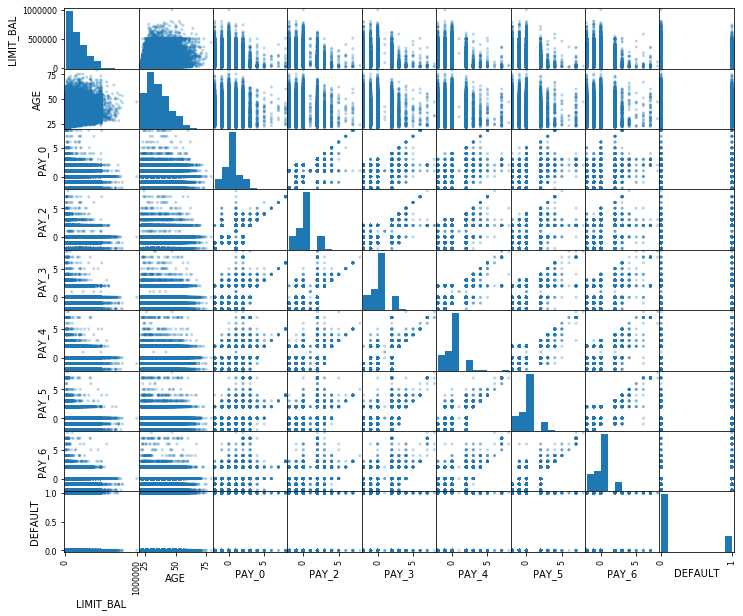

In [0]:
from pandas.plotting import scatter_matrix

## Takes a long time to run, uncomment to risk it
#scatter_matrix(ccc.select(correlation_attribute_list).toPandas(), figsize=(12,10), alpha=0.3)

In [0]:
# Combining attributes

from pyspark.sql.functions import col

ccc_combined = ccc\
  .withColumn('TOTAL_BILL_AMOUNT', col('BILL_AMT1') + col('BILL_AMT2') + col('BILL_AMT3') + col('BILL_AMT4') + col('BILL_AMT5') + col('BILL_AMT6'))\
  .withColumn('TOTAL_PAY_AMOUNT', col('PAY_AMT1') + col('PAY_AMT2') + col('PAY_AMT3') + col('PAY_AMT4') + col('PAY_AMT5') + col('PAY_AMT6'))\
  .withColumn('BILL_PAY_DIFFERENCE', col('TOTAL_BILL_AMOUNT') - col('TOTAL_PAY_AMOUNT'))

ccc_combined.select('TOTAL_BILL_AMOUNT', 'TOTAL_PAY_AMOUNT', 'BILL_PAY_DIFFERENCE', 'LIMIT_BAL', 'DEFAULT').display()

TOTAL_BILL_AMOUNT TOTAL_PAY_AMOUNT BILL_PAY_DIFFERENCE LIMIT_BAL DEFAULT 7704 689 7015 20000 1 17077 5000 12077 120000 1 101653 11018 90635 90000 0 231334 8388 222946 50000 0 109339 59049 50290 50000 0 238114 7772 230342 50000 0 2724595 180759 2543836 500000 0 13486 4791 8695 100000 0 65212 6761 58451 140000 0 26919 14129 12790 20000 0 34467 6472 27995 200000 0 88369 66308 22061 260000 0 41007 23370 17637 630000 0 338685 10700 327985 70000 1 373591 18000 355591 250000 0 196416 6200 190216 50000 0 106161 6350 99811 20000 1 966014 361897 604117 320000 0 0 0 0 360000 0 0 0 0 180000 0 123883 42231 81652 130000 0 1896 1580 316 120000 1 265475 11010 254465 70000 1 26965 22589 4376 450000 1 31864 16400 15464 90000 0 214295 7891 206404 50000 0 -394 2500 -2894 60000 1 112268 7112 105156 50000 0 40208 39567 641 50000 0 97082 6600 90482 50000 0 113746 97489 16257 230000 0 151869 6934 144935 50000 1 495237 18744 476493 100000 0 125744 158502 -32758 500000 0 58318 45425 12893 500000 0 25312 2280 23032 160000 0 1069977 41923 1028054 280000 0 32279 53349 -21070 60000 0 780 780 0 50000 1 51643 37357 14286 280000 0 1650751 243840 1406911 360000 0 392856 19342 373514 70000 0 22761 7227 15534 10000 0 385134 20000 365134 140000 0 147185 13000 134185 40000 0 0 0 0 210000 1 79328 20075 59253 20000 1 9837 2183 7654 150000 1 114815 93332 21483 380000 0 115810 6246 109564 20000 0 229012 8100 220912 70000 1 265185 9606 255579 100000 0 44125 30668 13457 310000 0 259151 10246 248905 180000 0 176751 12867 163884 150000 0 8388 6483 1905 500000 0 55404 29179 26225 180000 0 952362 34062 918300 180000 0 6747 1900 4847 200000 0 2284140 109029 2175111 400000 0 109699 8816 100883 500000 1 244242 12120 232122 70000 0 157674 6125 151549 50000 1 57884 1000 56884 50000 1 2452 2353 99 130000 0 469636 9522 460114 200000 1 22852 3010 19842 10000 1 8589 9198 -609 210000 0 7901 41379 -33478 130000 0 88326 3700 84626 20000 0 2340 1950 390 80000 0 362152 13800 348352 320000 1 26425 19512 6913 200000 0 5514 5514 0 290000 0 142199 141997 202 340000 0 101328 5590 95738 20000 0 145406 6358 139048 50000 0 1746 1746 0 300000 0 149186 8411 140775 30000 1 0 0 0 240000 1 614823 21926 592897 470000 0 294903 161355 133548 360000 0 143566 5345 138221 60000 1 700952 22753 678199 400000 0 177499 6052 171447 50000 0 667013 101747 565266 160000 0 3510 2340 1170 360000 1 31623 8216 23407 160000 0 226534 56705 169829 130000 0 61309 6151 55158 20000 0 862167 32800 829367 200000 1 15360 3968 11392 280000 0 3555 7555 -4000 100000 0 4162 11018 -6856 160000 0 197839 6261 191578 60000 0 354716 11756 342960 90000 0 58460 120613 -62153 360000 0 479411 23841 455570 150000 0 83794 3783 80011 50000 0 93217 5685 87532 20000 1 13679 13007 672 140000 0 132602 42019 90583 380000 0 2761015 130971 2630044 480000 0 205366 6870 198496 50000 1 342038 13517 328521 60000 0 32109 28529 3580 70000 0 17865 12794 5071 80000 0 10987 15285 -4298 350000 0 680938 287768 393170 130000 0 -618 0 -618 360000 0 639580 32747 606833 330000 0 93139 7000 86139 50000 0 855008 40604 814404 280000 0 335186 17866 317320 100000 0 119110 5471 113639 50000 0 117660 6312 111348 30000 1 7456 7656 -200 240000 0 99022 7700 91322 80000 1 71828 57891 13937 400000 0 209703 11073 198630 240000 0 290245 10235 280010 50000 1 0 0 0 450000 1 0 0 0 110000 0 1626538 53973 1572565 310000 1 112100 4308 107792 20000 0 0 0 0 20000 0 617685 22056 595629 200000 0 668882 14771 654111 180000 1 30548 6200 24348 50000 1 264125 7511 256614 60000 0 32776 31886 890 30000 0 11279 8944 2335 240000 0 1349911 53309 1296602 420000 0 1369317 49096 1320221 330000 0 123482 5460 118022 30000 0 77708 4627 73081 240000 0 140829 20000 120829 150000 0 43256 7046 36210 210000 0 6932 6180 752 50000 1 208330 8960 199370 50000 0 0 0 0 240000 1 3828 5580 -1752 180000 0 99487 13500 85987 50000 0 67988 65846 2142 170000 0 26510 23641 2869 20000 0 48184 7183 41001 50000 0 105012 3752 101260 170000 1 794273 87000 707273 200000 0 61950 4121 57829 80000 0 21038 24469 -3431 260000 0 411

In [0]:
# Changing all 0s in marriage to 3s (other)
from pyspark.sql.functions import when   

ccc_fixed_marriage = ccc_combined.withColumn('MARRIAGE', when(ccc_combined.MARRIAGE==3, 0).otherwise(ccc_combined.MARRIAGE))
ccc_fixed_education = ccc_fixed_marriage.withColumn('EDUCATION', when(ccc_fixed_marriage.EDUCATION>4, 4).otherwise(ccc_fixed_marriage.EDUCATION))

Preparing categorical attributes

In [0]:
from pyspark.ml.feature import OneHotEncoder

#sex, education, marriage
sex_encoder = OneHotEncoder().setInputCol('SEX').setOutputCol('SEX_OH')
education_encoder = OneHotEncoder().setInputCol('EDUCATION').setOutputCol('EDUCATION_OH')
marriage_encoder = OneHotEncoder().setInputCol('MARRIAGE').setOutputCol('MARRIAGE_OH')

Preparing continuous attributes

In [0]:
ccc_fixed_education.display()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 DEFAULT TOTAL_BILL_AMOUNT TOTAL_PAY_AMOUNT BILL_PAY_DIFFERENCE 1 20000 2 2 1 24 2 2 -1 -1 -2 -2 3913 3102 689 0 0 0 0 689 0 0 0 0 1 7704 689 7015 2 120000 2 2 2 26 -1 2 0 0 0 2 2682 1725 2682 3272 3455 3261 0 1000 1000 1000 0 2000 1 17077 5000 12077 3 90000 2 2 2 34 0 0 0 0 0 0 29239 14027 13559 14331 14948 15549 1518 1500 1000 1000 1000 5000 0 101653 11018 90635 4 50000 2 2 1 37 0 0 0 0 0 0 46990 48233 49291 28314 28959 29547 2000 2019 1200 1100 1069 1000 0 231334 8388 222946 5 50000 1 2 1 57 -1 0 -1 0 0 0 8617 5670 35835 20940 19146 19131 2000 36681 10000 9000 689 679 0 109339 59049 50290 6 50000 1 1 2 37 0 0 0 0 0 0 64400 57069 57608 19394 19619 20024 2500 1815 657 1000 1000 800 0 238114 7772 230342 7 500000 1 1 2 29 0 0 0 0 0 0 367965 412023 445007 542653 483003 473944 55000 40000 38000 20239 13750 13770 0 2724595 180759 2543836 8 100000 2 2 2 23 0 -1 -1 0 0 -1 11876 380 601 221 -159 567 380 601 0 581 1687 1542 0 13486 4791 8695 9 140000 2 3 1 28 0 0 2 0 0 0 11285 14096 12108 12211 11793 3719 3329 0 432 1000 1000 1000 0 65212 6761 58451 10 20000 1 3 2 35 -2 -2 -2 -2 -1 -1 0 0 0 0 13007 13912 0 0 0 13007 1122 0 0 26919 14129 12790 11 200000 2 3 2 34 0 0 2 0 0 -1 11073 9787 5535 2513 1828 3731 2306 12 50 300 3738 66 0 34467 6472 27995 12 260000 2 1 2 51 -1 -1 -1 -1 -1 2 12261 21670 9966 8517 22287 13668 21818 9966 8583 22301 0 3640 0 88369 66308 22061 13 630000 2 2 2 41 -1 0 -1 -1 -1 -1 12137 6500 6500 6500 6500 2870 1000 6500 6500 6500 2870 0 0 41007 23370 17637 14 70000 1 2 2 30 1 2 2 0 0 2 65802 67369 65701 66782 36137 36894 3200 0 3000 3000 1500 0 1 338685 10700 327985 15 250000 1 1 2 29 0 0 0 0 0 0 70887 67060 63561 59696 56875 55512 3000 3000 3000 3000 3000 3000 0 373591 18000 355591 16 50000 2 3 0 23 1 2 0 0 0 0 50614 29173 28116 28771 29531 30211 0 1500 1100 1200 1300 1100 0 196416 6200 190216 17 20000 1 1 2 24 0 0 2 2 2 2 15376 18010 17428 18338 17905 19104 3200 0 1500 0 1650 0 1 106161 6350 99811 18 320000 1 1 1 49 0 0 0 -1 -1 -1 253286 246536 194663 70074 5856 195599 10358 10000 75940 20000 195599 50000 0 966014 361897 604117 19 360000 2 1 1 49 1 -2 -2 -2 -2 -2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 180000 2 1 2 29 1 -2 -2 -2 -2 -2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 21 130000 2 3 2 39 0 0 0 0 0 -1 38358 27688 24489 20616 11802 930 3000 1537 1000 2000 930 33764 0 123883 42231 81652 22 120000 2 2 1 39 -1 -1 -1 -1 -1 -1 316 316 316 0 632 316 316 316 0 632 316 0 1 1896 1580 316 23 70000 2 2 2 26 2 0 0 2 2 2 41087 42445 45020 44006 46905 46012 2007 3582 0 3601 0 1820 1 265475 11010 254465 24 450000 2 1 1 40 -2 -2 -2 -2 -2 -2 5512 19420 1473 560 0 0 19428 1473 560 0 0 1128 1 26965 22589 4376 25 90000 1 1 2 23 0 0 0 -1 0 0 4744 7070 0 5398 6360 8292 5757 0 5398 1200 2045 2000 0 31864 16400 15464 26 50000 1 3 2 23 0 0 0 0 0 0 47620 41810 36023 28967 29829 30046 1973 1426 1001 1432 1062 997 0 214295 7891 206404 27 60000 1 1 2 27 1 -2 -1 -1 -1 -1 -109 -425 259 -57 127 -189 0 1000 0 500 0 1000 1 -394 2500 -2894 28 50000 2 3 2 30 0 0 0 0 0 0 22541 16138 17163 17878 18931 19617 1300 1300 1000 1500 1000 1012 0 112268 7112 105156 29 50000 2 3 1 47 -1 -1 -1 -1 -1 -1 650 3415 3416 2040 30430 257 3415 3421 2044 30430 257 0 0 40208 39567 641 30 50000 1 1 2 26 0 0 0 0 0 0 15329 16575 17496 17907 18375 11400 1500 1500 1000 1000 1600 0 0 97082 6600 90482 31 230000 2 1 2 27 -1 -1 -1 -1 -1 -1 16646 17265 13266 15339 14307 36923 17270 13281 15339 14307 37292 0 0 113746 97489 16257 32 50000 1 2 2 33 2 0 0 0 0 0 30518 29618 22102 22734 23217 23680 1718 1500 1000 1000 1000 716 1 151869 6934 144935 33 100000 1 1 2 32 0 0 0 0 0 0 93036 84071 82880 80958 78703 75589 3023 3511 3302 3204 3200 2504 0 495237 18744 476493 34 500000 2 2 1 54 -2 -2 -2 -2 -2 -2 10929 4152 22722 7521 71439 8981 4152 22827 7521 71439 981 51582 0 125744 158502 -32758 35 500000 1 1 1 58 -2 -2 

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

va = VectorAssembler().setInputCols(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_PAY_DIFFERENCE', 'LIMIT_BAL']).setOutputCol('va_out')
scaler = StandardScaler().setInputCol('va_out').setOutputCol('scaled_features')

#Alternatively, use full set
va_full = VectorAssembler().setInputCols(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL']).setOutputCol('va_out_full')
scaler_full = StandardScaler().setInputCol('va_out_full').setOutputCol('scaled_features')

In [0]:
# Finally, before running transformation, we rename the label column:
ccc_fixed = ccc_fixed_education.withColumnRenamed('DEFAULT', 'label')

In [0]:
from pyspark.ml import Pipeline

numPipeline = Pipeline().setStages([va_full, scaler_full])
catPipeline = Pipeline().setStages([sex_encoder, education_encoder, marriage_encoder])
pipeline = Pipeline().setStages([catPipeline, numPipeline])
cleaned_ccc = pipeline.fit(ccc_fixed).transform(ccc_fixed)

cleaned_ccc.display()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 label TOTAL_BILL_AMOUNT TOTAL_PAY_AMOUNT BILL_PAY_DIFFERENCE SEX_OH EDUCATION_OH MARRIAGE_OH va_out_full scaled_features 1 20000 2 2 1 24 2 2 -1 -1 -2 -2 3913 3102 689 0 0 0 0 689 0 0 0 0 1 7704 689 7015 List(0, 2, List(), List()) List(0, 4, List(2), List(1.0)) List(0, 2, List(1), List(1.0)) List(1, 21, List(), List(20000.0, 24.0, 2.0, 2.0, -1.0, -1.0, -2.0, -2.0, 3913.0, 3102.0, 689.0, 0.0, 0.0, 0.0, 0.0, 689.0, 0.0, 0.0, 0.0, 0.0, 20000.0)) List(1, 21, List(), List(0.15414535998894324, 2.603628744963987, 1.7796736791807803, 1.6705842242124869, -0.8355143261989371, -0.8553305663148897, -1.7649331341008119, -1.7391491486204211, 0.053139869207970765, 0.0435834725779124, 0.009935199510232218, 0.0, 0.0, 0.0, 0.0, 0.029903384202815683, 0.0, 0.0, 0.0, 0.0, 0.15414535998894324)) 2 120000 2 2 2 26 -1 2 0 0 0 2 2682 1725 2682 3272 3455 3261 0 1000 1000 1000 0 2000 1 17077 5000 12077 List(0, 2, List(), List()) List(0, 4, List(2), List(1.0)) List(0, 2, List(), List()) List(1, 21, List(), List(120000.0, 26.0, -1.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2682.0, 1725.0, 2682.0, 3272.0, 3455.0, 3261.0, 0.0, 1000.0, 1000.0, 1000.0, 0.0, 2000.0, 120000.0)) List(1, 21, List(), List(0.9248721599336596, 2.820597807044319, -0.8898368395903902, 1.6705842242124869, 0.0, 0.0, 0.0, 1.7391491486204211, 0.03642247104926593, 0.024236457187910666, 0.03867373742589667, 0.05086048089002836, 0.05682831632873511, 0.054756928361119755, 0.0, 0.043401138175349324, 0.05679571695065346, 0.06383185262622842, 0.0, 0.1125019744244751, 0.9248721599336596)) 3 90000 2 2 2 34 0 0 0 0 0 0 29239 14027 13559 14331 14948 15549 1518 1500 1000 1000 1000 5000 0 101653 11018 90635 List(0, 2, List(), List()) List(0, 4, List(2), List(1.0)) List(0, 2, List(), List()) List(1, 21, List(), List(90000.0, 34.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29239.0, 14027.0, 13559.0, 14331.0, 14948.0, 15549.0, 1518.0, 1500.0, 1000.0, 1000.0, 1000.0, 5000.0, 90000.0)) List(1, 21, List(), List(0.6936541199502446, 3.6884740553656483, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39707555220338797, 0.19708103476801328, 0.19551722809758876, 0.2227633104018938, 0.24586676482834513, 0.2610903033078967, 0.09164851210352462, 0.06510170726302399, 0.05679571695065346, 0.06383185262622842, 0.06545228384617399, 0.28125493606118773, 0.6936541199502446)) 4 50000 2 2 1 37 0 0 0 0 0 0 46990 48233 49291 28314 28959 29547 2000 2019 1200 1100 1069 1000 0 231334 8388 222946 List(0, 2, List(), List()) List(0, 4, List(2), List(1.0)) List(0, 2, List(1), List(1.0)) List(1, 21, List(), List(50000.0, 37.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46990.0, 48233.0, 49291.0, 28314.0, 28959.0, 29547.0, 2000.0, 2019.0, 1200.0, 1100.0, 1069.0, 1000.0, 50000.0)) List(1, 21, List(), List(0.38536339997235813, 4.013927648486146, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6381401620451179, 0.6776794432142002, 0.7107633077777304, 0.4401172542543591, 0.47632162447578585, 0.4961370629518569, 0.12074902780438027, 0.08762689797603028, 0.06815486034078415, 0.07021503788885128, 0.06996849143156, 0.05625098721223755, 0.38536339997235813)) 5 50000 1 2 1 57 -1 0 -1 0 0 0 8617 5670 35835 20940 19146 19131 2000 36681 10000 9000 689 679 0 109339 59049 50290 List(0, 2, List(1), List(1.0)) List(0, 4, List(2), List(1.0)) List(0, 2, List(1), List(1.0)) List(1, 21, List(), List(50000.0, 57.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 8617.0, 5670.0, 35835.0, 20940.0, 19146.0, 19131.0, 2000.0, 36681.0, 10000.0, 9000.0, 689.0, 679.0, 50000.0)) List(1, 21, List(), List(0.38536339997235813, 6.183618269289469, -0.8898368395903902, 0.0, -0.8355143261989371, 0.0, 0.0, 0.0, 0.11702178711093383, 0.0796641810176542, 0.5167313126983621, 0.3254946423707805, 0.3149160475918849, 0.32123728809462804, 0.12074902780438027, 1.5919971494099885, 0.5679571695065346, 0.5744866736360559, 0.04509662357001388, 0.0381944203171093, 0.38536339997235813)) 

In [0]:
# Creating final dataset

va2 = VectorAssembler().setInputCols(['scaled_features', 'SEX_OH', 'EDUCATION_OH', 'MARRIAGE_OH']).setOutputCol('features')
dataset = va2.transform(cleaned_ccc).select('features', 'label')

dataset.display()

features label List(0, 29, List(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 28), List(0.15414535998894324, 2.603628744963987, 1.7796736791807803, 1.6705842242124869, -0.8355143261989371, -0.8553305663148897, -1.7649331341008119, -1.7391491486204211, 0.053139869207970765, 0.0435834725779124, 0.009935199510232218, 0.029903384202815683, 0.15414535998894324, 1.0, 1.0)) 1 List(0, 29, List(0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 25), List(0.9248721599336596, 2.820597807044319, -0.8898368395903902, 1.6705842242124869, 1.7391491486204211, 0.03642247104926593, 0.024236457187910666, 0.03867373742589667, 0.05086048089002836, 0.05682831632873511, 0.054756928361119755, 0.043401138175349324, 0.05679571695065346, 0.06383185262622842, 0.1125019744244751, 0.9248721599336596, 1.0)) 1 List(0, 29, List(0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25), List(0.6936541199502446, 3.6884740553656483, 0.39707555220338797, 0.19708103476801328, 0.19551722809758876, 0.2227633104018938, 0.24586676482834513, 0.2610903033078967, 0.09164851210352462, 0.06510170726302399, 0.05679571695065346, 0.06383185262622842, 0.06545228384617399, 0.28125493606118773, 0.6936541199502446, 1.0)) 0 List(0, 29, List(0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 28), List(0.38536339997235813, 4.013927648486146, 0.6381401620451179, 0.6776794432142002, 0.7107633077777304, 0.4401172542543591, 0.47632162447578585, 0.4961370629518569, 0.12074902780438027, 0.08762689797603028, 0.06815486034078415, 0.07021503788885128, 0.06996849143156, 0.05625098721223755, 0.38536339997235813, 1.0, 1.0)) 0 List(1, 29, List(), List(0.38536339997235813, 6.183618269289469, -0.8898368395903902, 0.0, -0.8355143261989371, 0.0, 0.0, 0.0, 0.11702178711093383, 0.0796641810176542, 0.5167313126983621, 0.3254946423707805, 0.3149160475918849, 0.32123728809462804, 0.12074902780438027, 1.5919971494099885, 0.5679571695065346, 0.5744866736360559, 0.04509662357001388, 0.0381944203171093, 0.38536339997235813, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0)) 0 List(0, 29, List(0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24), List(0.38536339997235813, 4.013927648486146, 0.8745738760524706, 0.8018263044967384, 0.8306922690645249, 0.30146337603337714, 0.32269601680273635, 0.33623205565871267, 0.15093628475547533, 0.07877306578825902, 0.037314786036579325, 0.06383185262622842, 0.06545228384617399, 0.04500078976979004, 0.38536339997235813, 1.0, 1.0)) 0 List(0, 29, List(0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24), List(3.853633999723581, 3.1460514001648177, 4.997089694124958, 5.788972637643198, 6.416884366400448, 8.435083293525844, 7.944499933929969, 7.958208419252542, 3.320598264620457, 1.736045527013973, 2.1582372441248316, 1.2918928653022372, 0.8999689028848924, 0.774576093912511, 3.853633999723581, 1.0, 1.0)) 0 List(0, 29, List(0, 1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 25), List(0.7707267999447163, 2.495144213923821, -0.8352921121062434, -0.8355143261989371, -0.8695745743102106, 0.16128011416147733, 0.005339045641394814, 0.008666262562626361, 0.0034352586420220866, -0.0026152539207724697, 0.009520753873276572, 0.02294231528283225, 0.026084084043384942, 0.037086306375838714, 0.11041800284849553, 0.0867390222812703, 0.7707267999447163, 1.0)) 0 List(0, 29, List(0, 1, 4, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 26, 28), List(1.0790175199226029, 3.037566869124652, 1.6710286523978741, 0.1532541334045362, 0.1980504930555297, 0.1745941882001331, 0.18980969808928372, 0.19397288985955807, 0.06244741385311388, 0.20098675678039096, 0.024535749722682295, 0.06383185262622842, 0.06545228384617399, 0.05625098721223755, 1.0790175199226029, 1.0, 1.0)) 0 List(0, 29, List(0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 17, 18, 20, 22, 26), List(0.15414535998894324, 3.7969585864058146, -1.7796736791807803, -1.6705842242124869, -1.6710286523978741, -1.7106611326297794, -0.8824665670504059, -0.8695745743102106, 0.2139409292294812, 0.23360269468258144, 0.8302609071093

In [0]:
trainSet, testSet = dataset.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LinearSVC

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = LinearSVC()

Deciding on a loss function is very important. Here, however, we do not know how the model should be used, so we will use the default loss function.

# Decision Tree

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

paramGrid = ParamGridBuilder()\
  .addGrid(dt.maxDepth, [10, 15, 20])\
  .build()

evaluator = BinaryClassificationEvaluator().setLabelCol("label")
cv = CrossValidator()\
  .setEstimator(dt)\
  .setEvaluator(evaluator)\
  .setEstimatorParamMaps(paramGrid)\
  .setNumFolds(4)
cvModel = cv.fit(trainSet)

predictions = cvModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print('AUC on test data = ' + str(auc))

+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0|(29,[0,1,2,3,4,5,...|
 1.0| 1|(29,[0,1,2,3,4,5,...|
 1.0| 1|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
+----------+-----+--------------------+
only showing top 5 rows

AUC on test data = 0.2033364845902693

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
out = cvModel.transform(testSet).select('prediction', 'label')\
  .rdd.map(lambda x: ((float(x[0])),(float(x[1]))))
metrics = BinaryClassificationMetrics(out)
metrics_multi = MulticlassMetrics(out)

print('Best model depth: ' + str(cvModel.bestModel.getMaxDepth()))
#print('Best model number of trees: ' + str(cvModel.bestModel.getNumTrees))

print('Area under ROC: ' + str(metrics.areaUnderROC))
print('Area under PR: ' + str(metrics.areaUnderPR))

pandas_predictions = predictions.select('label', 'prediction').toPandas()
labels_list = pandas_predictions.label.tolist()
predictions_list = pandas_predictions.prediction.tolist()

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: ')
print(confusion_matrix(labels_list, predictions_list))
print(classification_report(labels_list, predictions_list))

Best model depth: 20
Area under ROC: 0.6317413671241195
Area under PR: 0.3794902051750099
Confusion matrix: 
[[4117 640]
 [ 791 523]]
 precision recall f1-score support

 0 0.84 0.87 0.85 4757
 1 0.45 0.40 0.42 1314

 accuracy 0.76 6071
 macro avg 0.64 0.63 0.64 6071
weighted avg 0.75 0.76 0.76 6071

# Random Forest

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

paramGrid = ParamGridBuilder()\
  .addGrid(rfc.maxDepth, [10, 15])\
  .addGrid(rfc.numTrees, [1, 5])\
  .build()

evaluator = BinaryClassificationEvaluator().setLabelCol("label")
cv = CrossValidator()\
  .setEstimator(rfc)\
  .setEvaluator(evaluator)\
  .setEstimatorParamMaps(paramGrid)\
  .setNumFolds(4)
cvModel = cv.fit(trainSet)

predictions = cvModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print('AUC on test data = ' + str(auc))

+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0|(29,[0,1,2,3,4,5,...|
 0.0| 1|(29,[0,1,2,3,4,5,...|
 0.0| 1|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
+----------+-----+--------------------+
only showing top 5 rows

AUC on test data = 0.542775388254118

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
out = cvModel.transform(testSet).select('prediction', 'label')\
  .rdd.map(lambda x: ((float(x[0])),(float(x[1]))))
metrics = BinaryClassificationMetrics(out)
metrics_multi = MulticlassMetrics(out)

print('Best model depth: ' + str(cvModel.bestModel.getMaxDepth()))
print('Best model number of trees: ' + str(cvModel.bestModel.getNumTrees))

print('Area under ROC: ' + str(metrics.areaUnderROC))
print('Area under PR: ' + str(metrics.areaUnderPR))

pandas_predictions = predictions.select('label', 'prediction').toPandas()
labels_list = pandas_predictions.label.tolist()
predictions_list = pandas_predictions.prediction.tolist()

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: ')
print(confusion_matrix(labels_list, predictions_list))
print(classification_report(labels_list, predictions_list))

Best model depth: 10
Best model number of trees: 5
Area under ROC: 0.656632107326254
Area under PR: 0.5122431663922138
Confusion matrix: 
[[4495 262]
 [ 830 484]]
 precision recall f1-score support

 0 0.84 0.94 0.89 4757
 1 0.65 0.37 0.47 1314

 accuracy 0.82 6071
 macro avg 0.75 0.66 0.68 6071
weighted avg 0.80 0.82 0.80 6071

# Logistic Regression

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

paramGrid = ParamGridBuilder()\
  .addGrid(lr.regParam, [0,0.01,0.1,1])\
  .build()

evaluator = BinaryClassificationEvaluator().setLabelCol("label")
cv = CrossValidator()\
  .setEstimator(lr)\
  .setEvaluator(evaluator)\
  .setEstimatorParamMaps(paramGrid)\
  .setNumFolds(4)
cvModel = cv.fit(trainSet)

predictions = cvModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print('AUC on test data = ' + str(auc))

+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0|(29,[0,1,2,3,4,5,...|
 0.0| 1|(29,[0,1,2,3,4,5,...|
 0.0| 1|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
 0.0| 0|(29,[0,1,2,3,4,5,...|
+----------+-----+--------------------+
only showing top 5 rows

AUC on test data = 0.5141220303207732

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
out = cvModel.transform(testSet).select('prediction', 'label')\
  .rdd.map(lambda x: ((float(x[0])),(float(x[1]))))
metrics = BinaryClassificationMetrics(out)
metrics_multi = MulticlassMetrics(out)

print('Best regualization parameter: ' + str(cvModel.bestModel.getRegParam()))

print('Area under ROC: ' + str(metrics.areaUnderROC))
print('Area under PR: ' + str(metrics.areaUnderPR))

pandas_predictions = predictions.select('label', 'prediction').toPandas()
labels_list = pandas_predictions.label.tolist()
predictions_list = pandas_predictions.prediction.tolist()

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: ')
print(confusion_matrix(labels_list, predictions_list))
print(classification_report(labels_list, predictions_list))

Best regualization parameter: 0.0
Area under ROC: 0.6077609252598669
Area under PR: 0.5268028603806375
Confusion matrix: 
[[4631 126]
 [ 996 318]]
 precision recall f1-score support

 0 0.82 0.97 0.89 4757
 1 0.72 0.24 0.36 1314

 accuracy 0.82 6071
 macro avg 0.77 0.61 0.63 6071
weighted avg 0.80 0.82 0.78 6071

## Main results:

* We found that it was better to use the full dataset than our calculated columns.
* Those models with more layers and trees were selected by the cross-validator as best models, but without much improvement in AUC. Of course, these models took much longer to train.
* Decision Tree model
  * Precision: 0.45
  * Recall: 0.40
  * F1 score: 0.42
* Random Forest model
  * Precision: 0.65
  * Recall: 0.35
  * F1 score: 0.47
* Logistic Regression model
  * Precision: 0.72
  * Recall: 0.24
  * F1 score: 0.36
* We selected the **Random Forest model** as our best model, based on the F1 score for positive labels, although it did not have the highest recall.
* Next steps would be to dive deeper into what the data actually means and try to make more sense of the numerical columns. Also to explore what is the best loss function based on what we are trying to achieve, e.g. is it most important to predict who will definitely default on their payments or try to respond to people who are likely to default (predict all those who are likely to default). We could also explore other models.